# Linear Regression

In [2]:
#Import various libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read data from the file
data = pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
#Check if there are any null values
data.isna().sum()

Year     0
Price    0
dtype: int64

In [26]:
#Check unique values
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [16]:
years = data['Year'].unique()
years

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

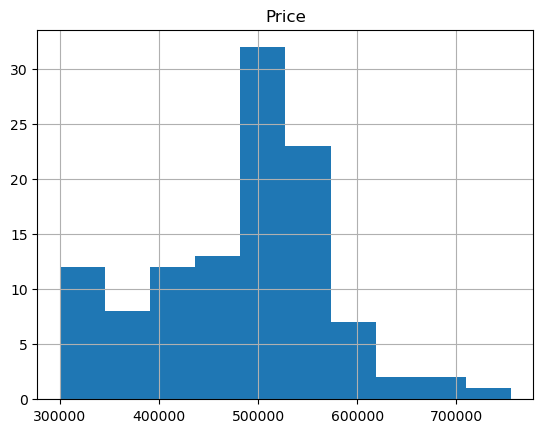

In [111]:
#Plot the values of Price in Histogram
data.hist(column = 'Price')
plt.show()

Find the correlation

<AxesSubplot:>

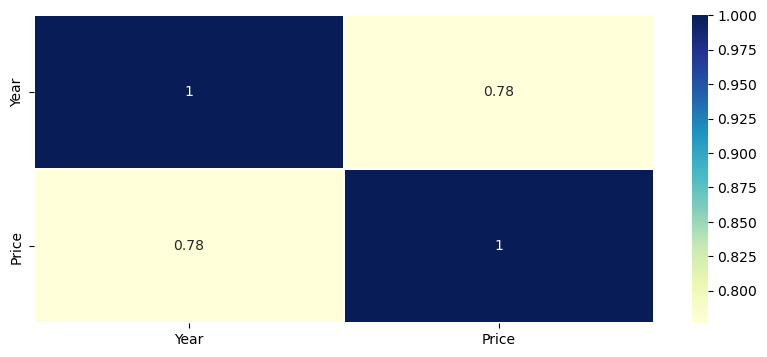

In [8]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,linewidth=0.3,cmap='YlGnBu')

Year and Price has a positive correlation

Set independent variable (y) and dependent variable (x)

In [48]:
#We have to predict Price, so it will be the independent variable
y = data['Price']

#Remaining data (Year) will be the dependent variable
x = data.drop(['Price'],axis=1)

In [50]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [51]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

Split the data for Training and Testing

In [129]:
#Training and Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [53]:
x_train

,Year
81,2014
77,2015
15,2017
30,2019
45,2018
...,...
106,2015
14,2017
92,2017
51,2018


In [55]:
y_train

81     390000
77     325000
15     500000
30     650000
45     450000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 84, dtype: int64

In [56]:
x_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [57]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

Creating a Linear Model

In [58]:
#Creating a linear model ie fitting
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [59]:
#Learning through data in x_train and y_train
model=lr.fit(x_train,y_train)

In [60]:
#Predicting values using Test data of dependent variable
y_pred = model.predict(x_test)

In [61]:
y_pred

array([599223.07304102, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304102, 599223.07304102, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304102,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

Finding Mean Squared Error and R2 Value

In [117]:
#Find MSE and R2 value using Predicted values and data for testing (independent variable)
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is  : ',r2_score(y_test,y_pred))

MSE is :  10991894005.471514
R2 is  :  -0.5167181794897955


Predict the Price of a 2022 model car

In [105]:
#Give 2022 as the data
a = [[2022]]
predicted_price = model.predict(a)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [106]:
predicted_price

array([711842.72487643])

# Lasso Regression

In [130]:
from sklearn.linear_model import Lasso

In [131]:
lasso = Lasso()

In [134]:
#Create a Lasso Regression Model
model2 = lasso.fit(x_train,y_train)

In [142]:
#Predict values using test data
y_pred = model2.predict(x_test)

In [143]:
y_pred

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

In [144]:
#Lasso score for test data and train data
train_score = lasso.score(x_train,y_train)
test_score = lasso.score(x_test,y_test)

In [145]:
train_score

0.6358811055251276

In [146]:
test_score

0.4348007175862566

In [149]:
#Price of 2022 model car
a = [[2022]]
new_price = model2.predict(a)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [150]:
new_price

array([740157.95700142])